<a href="https://colab.research.google.com/github/felipemoreia/acelaradev-codenation/blob/master/testes_estatisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [0]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
athletes = pd.read_csv("athletes.csv")

In [0]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [0]:
# Sua análise começa aqui.

df = athletes
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [0]:
df.tail()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0
11537,711404576,le Roux Hamman,RSA,male,1/6/92,1.85,70.0,athletics,0,0,0


In [0]:
df.shape

(11538, 11)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [0]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [0]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [0]:
def q1():
    df_amostra = get_sample(df, 'height', n=3000)
    teste_shapiro = sct.shapiro(df_amostra)
    if teste_shapiro[1]>0.05:
        return True
    else:
        return False
    

In [0]:
q1()

False

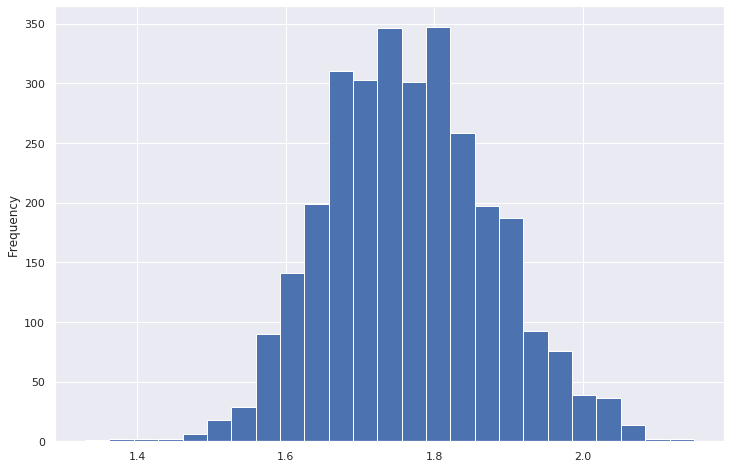

In [0]:
df_amostra = get_sample(df, 'height', n=3000)
df_amostra.plot(kind='hist', bins=25)


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [0]:
def q2():
    df_amostra = get_sample(df, 'height', n=3000)
    teste_jarquebera = sct.jarque_bera(df_amostra)
    if teste_jarquebera[1]>0.05:
        return True
    else:
        return False

In [0]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [0]:
def q3():
    amostra_pesos = get_sample(df, 'weight', n=3000)
    teste_pearson = sct.normaltest(amostra_pesos)
    if teste_pearson[1]>0.05:
        return True
    else:
        return False

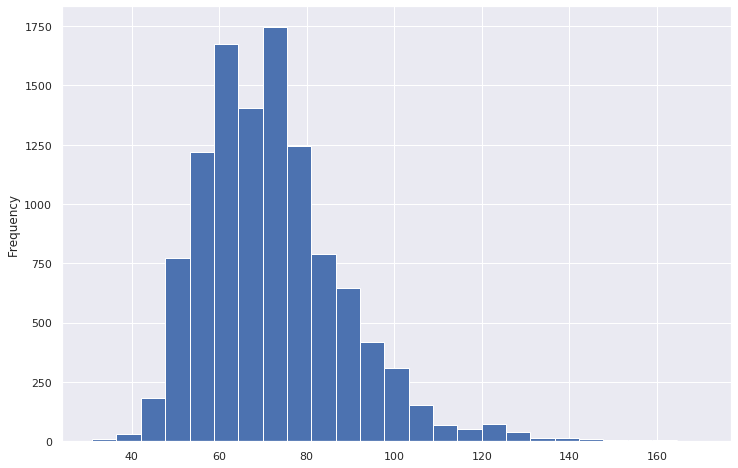

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

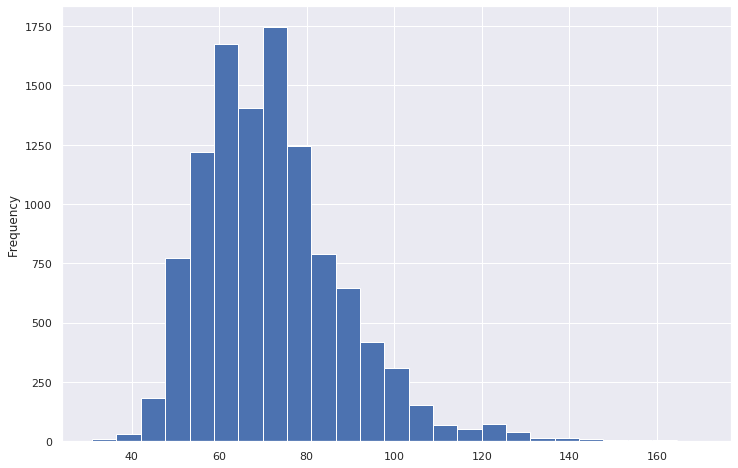

In [0]:
df['weight'].plot(kind='hist', bins=25)

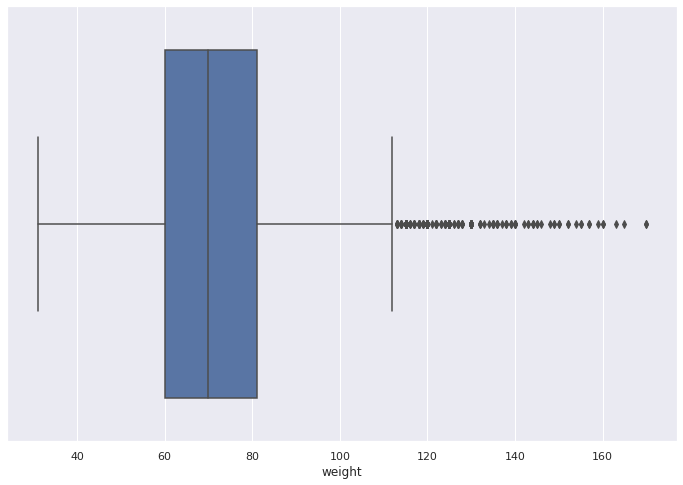

In [0]:
sns.boxplot(df.weight)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [0]:
def q4():
    df['log_peso'] = np.log(df.weight)
    weight_get_sample = get_sample(df, 'log_peso', n=3000)
    teste_normalidade = sct.normaltest(weight_get_sample)
    if teste_normalidade[1]>0.05:
        return True
    else:
        return False

In [0]:
q4()

False

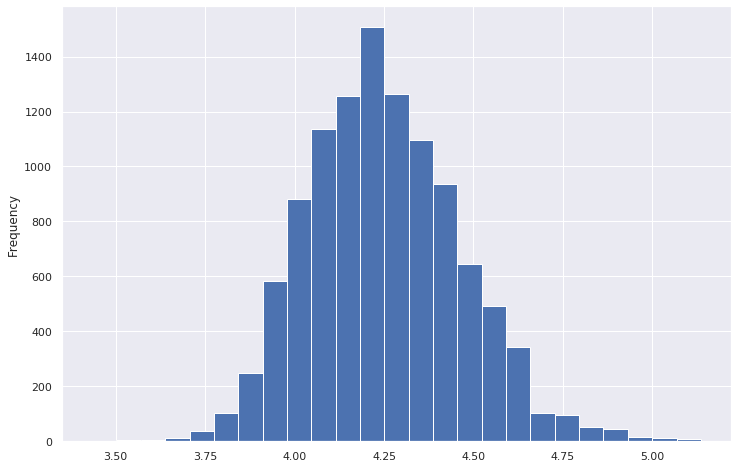

In [0]:
df['log_peso'] = np.log(df.weight)
df['log_peso'].plot(kind='hist', bins=25)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [0]:
df['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
CHN    404
GBR    374
JPN    346
CAN    321
ESP    313
ITA    312
RUS    286
NED    249
POL    242
ARG    223
KOR    213
NZL    208
UKR    205
SWE    164
HUN    154
COL    154
RSA    146
DEN    128
MEX    126
BLR    124
IND    123
CUB    123
EGY    122
BEL    108
SUI    104
      ... 
MDV      4
COD      4
SLE      4
ASA      4
VIN      4
IVB      4
GAM      4
COM      4
VAN      4
AFG      3
SSD      3
YEM      3
LIE      3
MON      3
BRU      3
SOL      3
KIR      3
STP      3
BIZ      3
TLS      3
GEQ      2
CHA      2
DMA      2
LBR      2
SWZ      2
MTN      2
BHU      2
NRU      2
SOM      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [0]:
bra = df[df['nationality']=='BRA']
usa = df[df['nationality']=='USA']
can = df[df['nationality']=='CAN']

In [0]:
def q5():
    teste_t = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')
    if teste_t[1] > 0.05:
        return True 
    else:
        return False 

In [0]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [0]:
def q6():
    teste_t = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    if teste_t[1] > 0.05:
        return True 
    else:
        return False 

In [0]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [0]:
def q7():
    teste_t = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
    p_valor = teste_t[1]
    return float(round(p_valor, 8))

In [0]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?